# 1.Analyse Bitcoin Time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [11]:
bitcoin= pd.read_csv('c:/Users/asus/Downloads/BTC-EUR.csv', index_col='Date', parse_dates= True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


<AxesSubplot:xlabel='Date'>

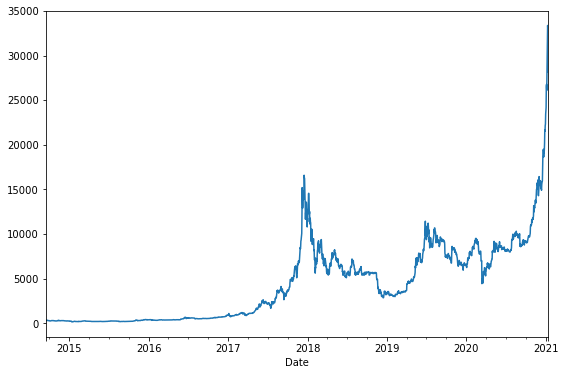

In [12]:
bitcoin['Close'].plot(figsize=(9, 6))

In [13]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11'],
              dtype='datetime64[ns]', name='Date', length=2309, freq=None)

<AxesSubplot:xlabel='Date'>

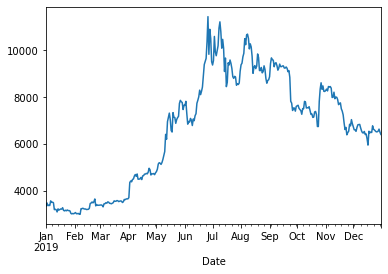

In [14]:
bitcoin['2019']['Close'].plot()

<AxesSubplot:xlabel='Date'>

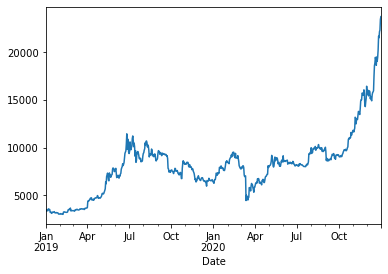

In [15]:
bitcoin['2019':'2020']['Close'].plot()

<AxesSubplot:xlabel='Date'>

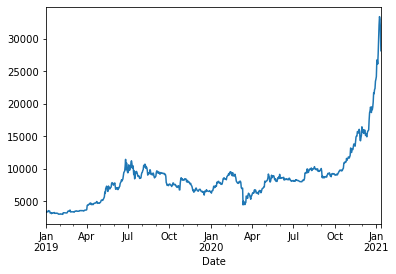

In [16]:
bitcoin.loc['2019':'2021','Close'].plot()

# 1.2 Resample

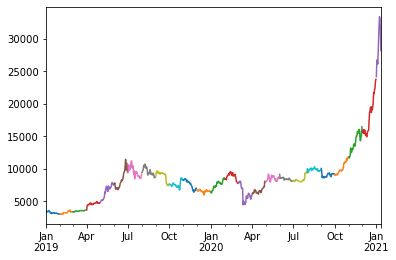

In [19]:
bitcoin['2019':'2021']['Close'].resample('M').plot()
plt.show()

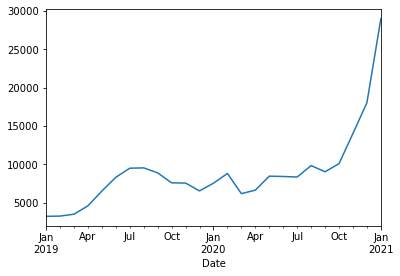

In [20]:
bitcoin['2019':'2021']['Close'].resample('M').mean().plot()
plt.show()

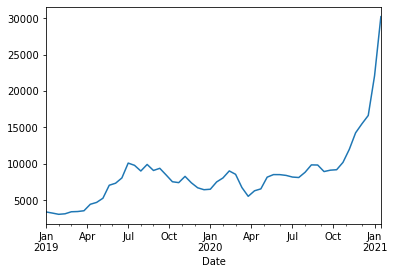

In [22]:
bitcoin['2019':'2021']['Close'].resample('2w').mean().plot()
plt.show()

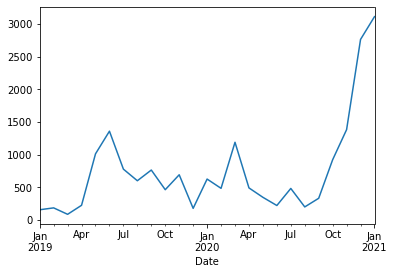

In [23]:
bitcoin['2019':'2021']['Close'].resample('M').std().plot()
plt.show()

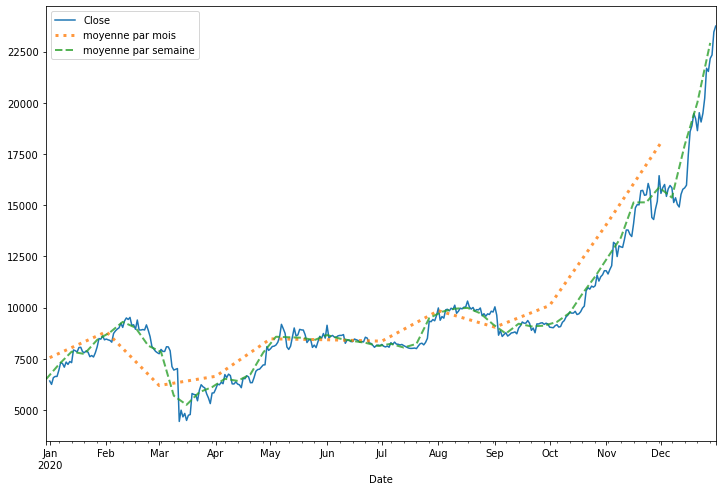

In [24]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2020', 'Close'].plot()
bitcoin.loc['2020', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha= 0.8)
bitcoin.loc['2020', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha= 0.8)
plt.legend()
plt.show()


# 1.3 Aggregate

In [25]:
bitcoin.loc['2020', 'Close'].resample('M').agg(['mean','std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2020-01-31,7557.609659,624.455403,6252.938477,8621.291016
2020-02-29,8824.453243,482.546136,7798.025879,9521.362305
2020-03-31,6196.439768,1187.380743,4444.237305,8089.786133
2020-04-30,6648.152279,489.151092,6032.151855,8091.744629
2020-05-31,8475.515499,345.122833,7958.571289,9183.599609
2020-06-30,8431.344987,219.765432,8063.251465,9138.788086
2020-07-31,8361.939390,480.838267,7998.321289,9613.430664
2020-08-31,9849.319556,198.046560,9382.727539,10319.689453
2020-09-30,9044.105273,330.322884,8590.609375,10038.563477


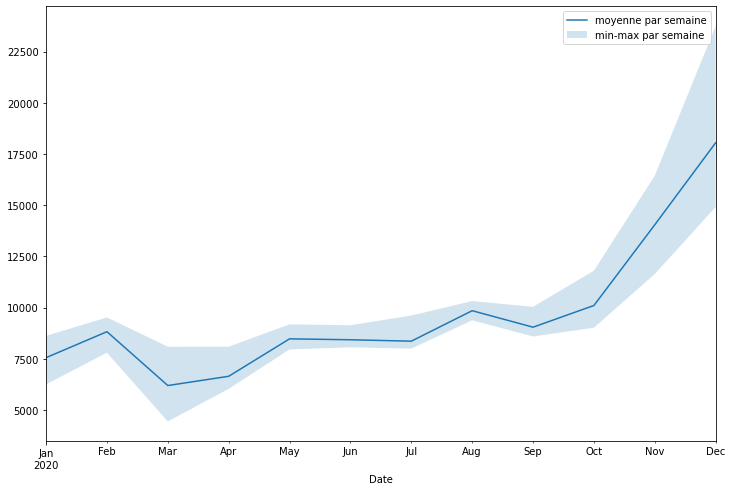

In [26]:
m= bitcoin.loc['2020', 'Close'].resample('M').agg(['mean','std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean']['2020'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()
plt.show()


# 1.4 Moving Average et EWM

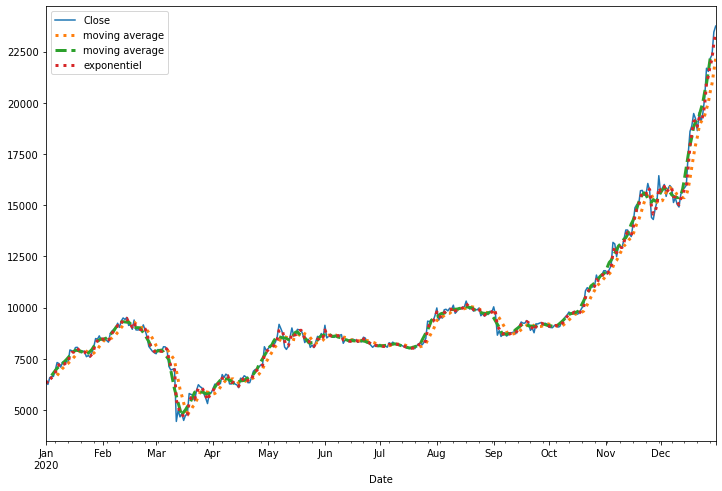

In [33]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2020', 'Close'].plot()
bitcoin.loc['2020', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':')
bitcoin.loc['2020', 'Close'].rolling(window=7, center= True).mean().plot(label='moving average', lw=3, ls='--')
bitcoin.loc['2020', 'Close'].ewm(alpha= 0.6).mean().plot(label='exponentiel', lw=3, ls=':')
plt.legend()
plt.show()

# 2 Ethereum 

In [36]:
eth= pd.read_csv('/Users/asus/Downloads/ETH-EUR.csv', index_col= 'Date', parse_dates= True)

<AxesSubplot:xlabel='Date'>

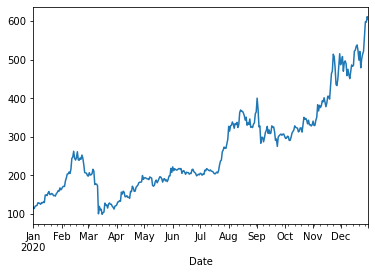

In [37]:
eth['2020']['Close'].plot()

# 2.1 Comparaison de 2 série temporelles

In [40]:
btc_eth = pd.merge(bitcoin, eth, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

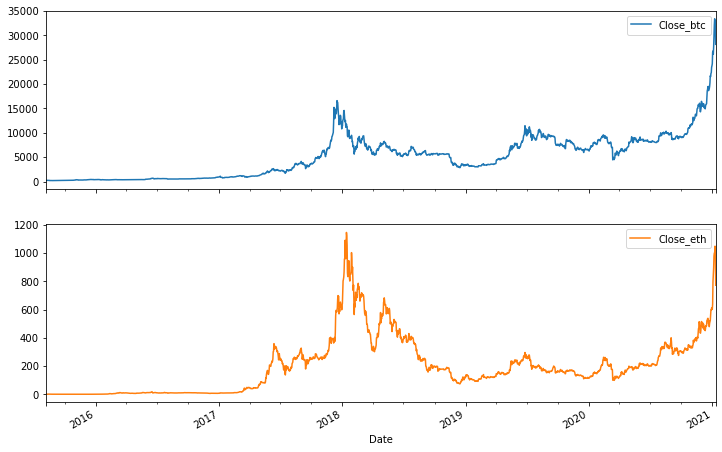

In [43]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots= True, figsize=(12, 8))

In [46]:
correlations= btc_eth[['Close_btc', 'Close_eth']].corr()


<AxesSubplot:>

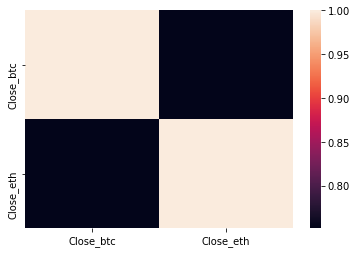

In [47]:
import seaborn as sns
sns.heatmap(correlations)

In [49]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [50]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

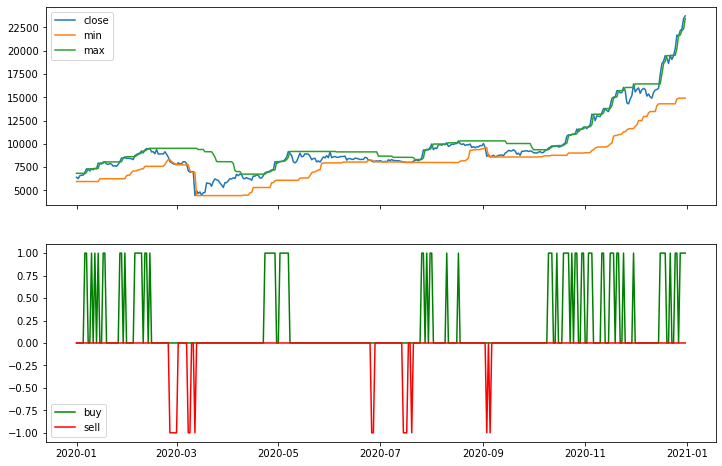

In [51]:

start ='2020'
end='2020'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])